# Eigenvectors, Eigenvalues, and PCA
**Purpose:** Interactive notebook to understand Basis, Span, Eigenvectors/Eigenvalues, and PCA with visualization and practice.



---


## Basis and Span
**Concept:**
- A **basis** is like the DNA of a space — a set of vectors that can uniquely describe any vector in that space.
- **Span** is all the points you can reach using combinations of vectors.

**Example in 2D:**

- **Standard basis:**  
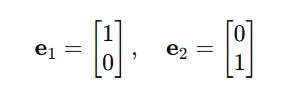

- **Any vector:**  
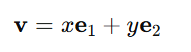

Vector v = [3 2]


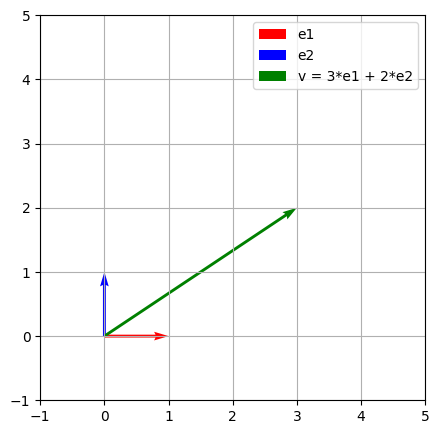

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Standard basis in 2D
e1 = np.array([1,0])
e2 = np.array([0,1])

# Create a vector as combination
x, y = 3, 2
v = x*e1 + y*e2
print("Vector v =", v)

# Plot basis and vector
fig, ax = plt.subplots(figsize=(5,5))
ax.quiver(0,0,e1[0], e1[1], angles='xy', scale_units='xy', scale=1, color='r', label='e1')
ax.quiver(0,0,e2[0], e2[1], angles='xy', scale_units='xy', scale=1, color='b', label='e2')
ax.quiver(0,0,v[0], v[1], angles='xy', scale_units='xy', scale=1, color='g', label='v = 3*e1 + 2*e2')
ax.set_xlim(-1,5)
ax.set_ylim(-1,5)
ax.grid()
ax.set_aspect('equal')
ax.legend()
plt.show()


**Explanation of the plot:**

The figure shows three vectors starting from the origin:

- `e1` (red) is the standard basis vector along the x-axis.
- `e2` (blue) is the standard basis vector along the y-axis.
- `v` (green) is the vector [3,2], created as a linear combination of the standard basis: v = 3*e1 + 2*e2.

This visualization demonstrates how any vector in 2D can be expressed as a linear combination of the standard basis vectors.


---



## Eigenvectors and Eigenvalues

Concept:

- Solve

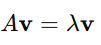


 * v = eigenvector (direction unchanged)


 * λ = eigenvalue (scaling factor)

- Geometrically: eigenvectors point in directions that don’t rotate under transformation; eigenvalues tell how much they stretch/shrink.


Eigenvalues: [5. 2.]
Eigenvectors (columns):
 [[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]


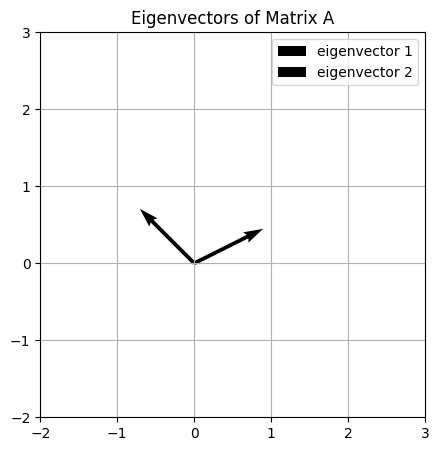

In [2]:
import numpy as np
from numpy.linalg import eig

# Define a matrix
A = np.array([[4, 2],
              [1, 3]])

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = eig(A)
print("Eigenvalues:", eigenvalues)
print("Eigenvectors (columns):\n", eigenvectors)

# Visualize eigenvectors
import matplotlib.pyplot as plt
origin = np.zeros(2)
fig, ax = plt.subplots(figsize=(5,5))
for i in range(len(eigenvalues)):
    ax.quiver(*origin, eigenvectors[0,i], eigenvectors[1,i], angles='xy', scale_units='xy', scale=1, width=0.01, label=f'eigenvector {i+1}')
ax.set_xlim(-2,3)
ax.set_ylim(-2,3)
ax.set_aspect('equal')
ax.grid()
ax.legend()
plt.title("Eigenvectors of Matrix A")
plt.show()


**Eigenvectors Visualization of Matrix A**

- `A = [[4,2],[1,3]]` is a 2x2 matrix.
- We compute its eigenvalues and eigenvectors using `numpy.linalg.eig`.
- **Eigenvalues**: represent the scaling factors along the eigenvectors.
- **Eigenvectors**: represent directions that remain invariant under the linear transformation defined by A.

The plot shows the eigenvectors of A originating from the origin. Each arrow represents one eigenvector. This visualization helps understand the principal directions along which the matrix stretches or compresses space.


---



## Principal Component Analysis (PCA)

Concept:

- PCA finds the directions of maximum variance in data.

- Steps:

1. Center the data.

2. Compute covariance matrix.

3. Find eigenvectors and eigenvalues.

4. Rotate data into eigenbasis; keep directions with largest eigenvalues.

Covariance eigenvalues: [13.46960307  2.03967082]
Covariance eigenvectors:
 [[ 0.85451696 -0.51942349]
 [ 0.51942349  0.85451696]]


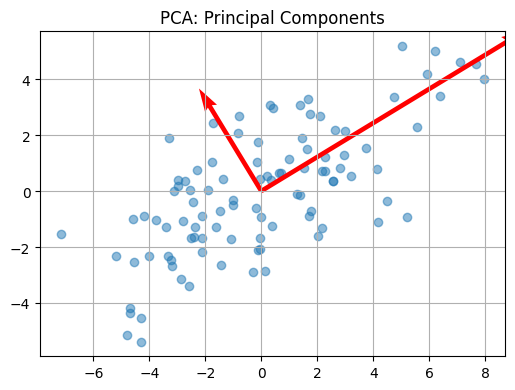

In [3]:
# Sample 2D data
np.random.seed(0)
X = np.dot(np.random.randn(100,2), np.array([[3,1],[1,2]]))  # correlated data

# Center data
X_centered = X - X.mean(axis=0)

# Covariance matrix
cov_matrix = np.cov(X_centered.T)

# Eigen decomposition
eigvals, eigvecs = eig(cov_matrix)
print("Covariance eigenvalues:", eigvals)
print("Covariance eigenvectors:\n", eigvecs)

# Plot data with principal components
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(X_centered[:,0], X_centered[:,1], alpha=0.5)
for i in range(2):
    ax.quiver(0, 0, eigvecs[0,i]*np.sqrt(eigvals[i])*3, eigvecs[1,i]*np.sqrt(eigvals[i])*3, angles='xy', scale_units='xy', scale=1, color='r', width=0.01, label=f'PC{i+1}' if i==0 else "")
ax.set_aspect('equal')
ax.grid()
plt.title("PCA: Principal Components")
plt.show()


**PCA on 2D Data**

- We generate 2D correlated data with 100 points.
- The data is centered by subtracting the mean of each dimension.
- The covariance matrix of the centered data is computed.
- Eigen decomposition of the covariance matrix gives:
  - **Eigenvalues**: indicate the amount of variance along each principal component.
  - **Eigenvectors**: indicate the directions of the principal components.
- The scatter plot shows the centered data, and the red arrows represent the principal components scaled by the square root of their eigenvalues.
- This visualization illustrates how PCA identifies the directions of maximum variance in the data.




---
### Eigenvectors, Eigenvalues, and PCA in Data Science & Machine Learning

**Overview:**

In data science and machine learning, understanding directions of variance in data is crucial. Eigenvectors and eigenvalues help us capture these directions and the magnitude of variance, forming the foundation for Principal Component Analysis (PCA), which is widely used for dimensionality reduction, data visualization, and feature extraction.

**Why it matters:**

1. Pattern Discovery:

Eigenvectors reveal principal directions of variation in data.

Eigenvalues show how much variance each direction explains.

This helps in understanding data structure before applying models.

2. Dimensionality Reduction:

Real-world datasets often have many features.

PCA reduces the number of features while preserving most of the information.

This makes models faster, more stable, and less prone to overfitting.

3. Improving Model Performance:

Using principal components as features reduces noise.

Some algorithms (e.g., linear regression, SVM) work better with decorrelated features.

4. Practical Applications:

Classification: Reduce dimensions before training classifiers.

Image Compression: Eigenfaces and PCA store images efficiently.

Exploratory Data Analysis (EDA): Understand feature correlations and main variation patterns.


### Example 1 : PCA on Iris Dataset

Eigenvalues (variance explained by each component): [4.22824171 0.24267075]
Eigenvectors (principal directions):
 [[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]


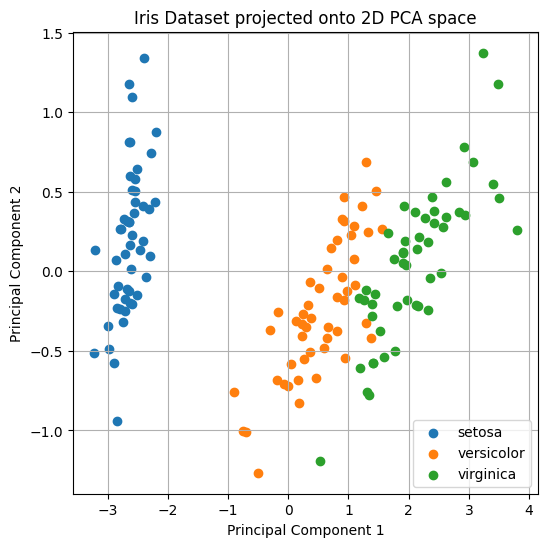

In [4]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Print eigenvalues and eigenvectors
print("Eigenvalues (variance explained by each component):", pca.explained_variance_)
print("Eigenvectors (principal directions):\n", pca.components_)

# Plot the projected data
plt.figure(figsize=(6,6))
for label in np.unique(y):
    plt.scatter(X_pca[y==label, 0], X_pca[y==label, 1], label=iris.target_names[label])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Iris Dataset projected onto 2D PCA space")
plt.legend()
plt.grid()
plt.show()


Explanation:

* The data (4 features) is projected onto 2 principal components.

* pca.explained_variance_ → Shows how much variance each component explains.

* pca.components_ → Eigenvectors, i.e., directions of maximum variance.

* The scatter plot shows how PCA separates different classes in 2D space.